# Shooting Method

Analytic initial slope s = 33.725
Shooting (secant) found s = 33.725 in 1 iter
Difference from analytic slope: 4.974e-13
Max abs error vs analytic (RK4 shooting): 3.389e-12


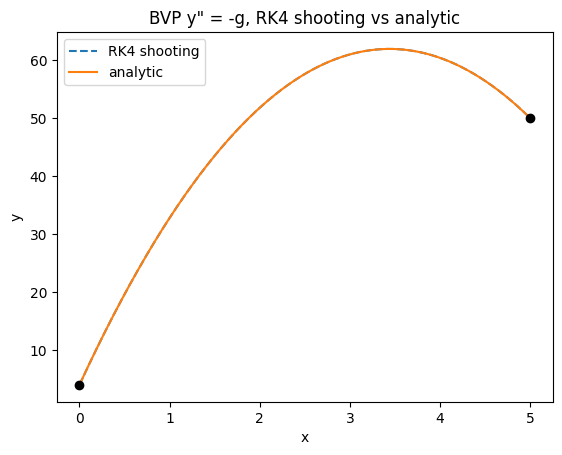

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter problem
g = 9.81         # g; ubah kalau mau nilai lain
a, b = 0.0, 5.0  # domain
ya, yb = 4.0, 50.0
# Exact solution constants (for verifikasi)
# Analitik: y(x) = -0.5*g*x^2 + C1*x, y(0)=0 => C2=0; impose y(5)=50 => C1 = (50 + 0.5*g*5^2)/5
C1_analytic = (yb + 0.5 * g * (b**2) -4) / b
def y_exact(x):
    return -0.5 * g * x**2 + C1_analytic * x +4

# RK4 step for system Y = [y, y']
def rk4_step(fun_rhs, x, Y, h):
    # Y' = [y2, -g]
    k1 = np.array([Y[1], fun_rhs(x, Y[0], Y[1])])
    Y2 = Y + 0.5*h*k1
    k2 = np.array([Y2[1], fun_rhs(x + 0.5*h, Y2[0], Y2[1])])
    Y3 = Y + 0.5*h*k2
    k3 = np.array([Y3[1], fun_rhs(x + 0.5*h, Y3[0], Y3[1])])
    Y4 = Y + h*k3
    k4 = np.array([Y4[1], fun_rhs(x + h, Y4[0], Y4[1])])
    return Y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def rhs(x, y, yp):
    return -g

def integrate_ivp(s, N=500):
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    Y = np.zeros((N+1, 2))
    Y[0, 0] = ya
    Y[0, 1] = s
    for i in range(N):
        Y[i+1] = rk4_step(rhs, x[i], Y[i], h)
    return x, Y[:,0], Y[:,1]

# Shooting with secant method to match y(b)=yb
def shooting_secant(s0, s1, tol=1e-10, maxiter=50, N=500):
    x0, y0, _ = integrate_ivp(s0, N=N); F0 = y0[-1] - yb
    x1, y1, _ = integrate_ivp(s1, N=N); F1 = y1[-1] - yb
    it = 0
    while abs(F1) > tol and it < maxiter:
        if (F1 - F0) == 0:
            break
        s2 = s1 - F1 * (s1 - s0) / (F1 - F0)
        s0, F0 = s1, F1
        s1 = s2
        x1, y1, _ = integrate_ivp(s1, N=N); F1 = y1[-1] - yb
        it += 1
    return x1, y1, s1, it

if __name__ == "__main__":
    print("Analytic initial slope s =", C1_analytic)

    # tebak slope
    s_guess0 = 0.0
    s_guess1 = 40.0
    x_shoot, y_shoot, s_found, its = shooting_secant(s_guess0, s_guess1, N=2000)
    print(f"Shooting (secant) found s = {s_found:.12g} in {its} iter")

    # Jarak melesetnya slope ke solusi analitik
    err_s = abs(s_found - C1_analytic)
    print(f"Difference from analytic slope: {err_s:.3e}")

    # Jarak melesetnya hasil RK4 ke solusi analitik
    y_ex_on_grid = y_exact(x_shoot)
    max_err = np.max(np.abs(y_shoot - y_ex_on_grid))
    print(f"Max abs error vs analytic (RK4 shooting): {max_err:.3e}")

    # visualisasi
    plt.plot(x_shoot, y_shoot, '--', label='RK4 shooting')
    plt.plot(x_shoot, y_ex_on_grid, '-', label='analytic')
    plt.scatter([a, b], [ya, yb], c='k', zorder=5)
    plt.legend()
    plt.xlabel('x'); plt.ylabel('y'); plt.title('BVP y\" = -g, RK4 shooting vs analytic')
    plt.show()


# Finite Difference

Finite Difference Method
[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
[-4.0009810e+00 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04
 -9.8100000e-04 -9.8100000e-04 -9.8100000e-04 -9.81

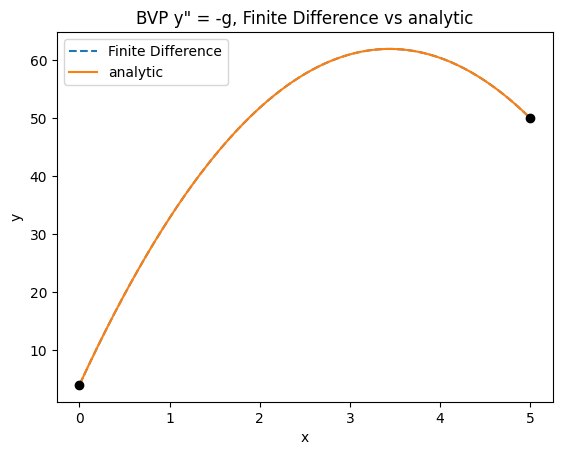

In [4]:
def finite_difference(N=500):
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    n = N-1
    A = np.zeros((n, n))
    B = np.zeros(n)
    #Pengisian matriks
    for i in range(n):
        A[i, i] = -2.0
        if i > 0:
            A[i, i-1] = 1.0
        if i < n-1:
            A[i, i+1] = 1.0
        B[i] = -g * h**2
    B[0] -= ya
    B[-1] -= yb

    y_inner = np.linalg.solve(A, B)
    y_full = np.zeros(N+1)
    y_full[0] = ya
    y_full[1:N] = y_inner
    y_full[N] = yb
    print(A)
    print(B)
    return x, y_full

if __name__ == "__main__":
    print("Finite Difference Method")

    x_fd, y_fd = finite_difference(N=500)

    # bandingkan dengan analitik
    y_ex_on_grid = y_exact(x_fd)
    max_err = np.max(np.abs(y_fd - y_ex_on_grid))
    print(f"Max abs error vs analytic (Finite Difference): {max_err:.3e}")

    # visualisasi
    plt.plot(x_fd, y_fd, '--', label='Finite Difference')
    plt.plot(x_fd, y_ex_on_grid, '-', label='analytic')
    plt.scatter([a, b], [ya, yb], c='k', zorder=5)
    plt.legend()
    plt.xlabel('x'); plt.ylabel('y'); plt.title('BVP y\" = -g, Finite Difference vs analytic')
    plt.show()